<a href="https://colab.research.google.com/github/inggriantip/skripsi/blob/master/sourcecode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [207]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
import math

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

from matplotlib import pyplot as plt

In [209]:
#load dataset
datatrain = pd.read_csv('/content/drive/My Drive/DataSet/cardio/dataset5050train_10.csv')
datatest = pd.read_csv('/content/drive/My Drive/DataSet/cardio/dataset5050test_10.csv')
#dataset.Type.value_count().plot(kind= "bar")
print (len(datatrain))
print (len(datatest))
datatrain

900
100


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,1098,18946,1,152,124.0,120,80,2,2,0,0,1,1
1,1084,17519,2,170,70.0,170,100,1,1,0,0,1,1
2,1085,14539,1,152,72.0,110,70,1,2,0,0,1,1
3,1086,23301,1,141,60.0,120,80,1,1,0,0,1,1
4,1087,14473,1,173,73.0,160,100,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,2138,22604,1,160,65.0,110,70,2,1,0,0,0,0
896,2141,20394,2,165,88.0,180,100,3,1,0,0,1,0
897,2144,14449,2,170,67.0,120,70,1,1,1,0,0,0
898,2151,18382,2,170,78.0,110,80,2,1,0,0,1,0


In [210]:
#split target and attribute

x_train = datatrain.iloc[:, 1:12]
y_train = datatrain.iloc[:, 12]
x_test = datatest.iloc[:, 1:12]
y_test = datatest.iloc[:, 12]

y_train

0      1
1      1
2      1
3      1
4      1
      ..
895    0
896    0
897    0
898    0
899    0
Name: cardio, Length: 900, dtype: int64

Text(0.5, 1.0, 'testing')

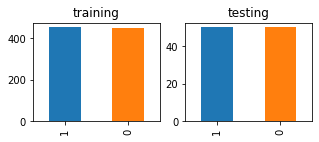

In [211]:
x_train
x_test
y_train
len(y_test)

plt.figure(figsize=(5,4))
plt.subplot(2,2,1);y_train.value_counts().plot(kind='bar', color=['C0','C1','C2','C3','C4','C5','C6']);plt.title('training')
plt.subplot(2,2,2);y_test.value_counts().plot(kind='bar', color=['C0','C1','C2','C3','C4','C5','C6']);plt.title('testing')

In [212]:
# scaling data
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test =sc_x.fit_transform(x_test)
x_train

array([[-0.21089305, -0.76270723, -1.49119152, ..., -0.33127188,
        -0.21847178,  0.53967417],
       [-0.79283543,  1.31111908,  0.69974832, ..., -0.33127188,
        -0.21847178,  0.53967417],
       [-2.00810402, -0.76270723, -1.49119152, ..., -0.33127188,
        -0.21847178,  0.53967417],
       ...,
       [-2.04480677,  1.31111908,  0.69974832, ...,  3.01866851,
        -0.21847178, -1.85296992],
       [-0.44089691,  1.31111908,  0.69974832, ..., -0.33127188,
        -0.21847178,  0.53967417],
       [ 0.65733072, -0.76270723,  0.45631056, ..., -0.33127188,
        -0.21847178, -1.85296992]])

In [213]:
math.sqrt(1000)

31.622776601683793

In [214]:
for x in range(501,901):   
    #choose method and fitting
    classifier = KNeighborsClassifier(n_neighbors=x,p=2,metric='euclidean')
    classifier.fit(x_train, y_train)

    #testing data
    y_pred = classifier.predict(x_test)

    #print result
    cm = confusion_matrix(y_test, y_pred)
    print("k = " , x)
    print (cm)
    print("Akurasi :" , accuracy_score(y_test, y_pred))
    print("presisi :" , precision_score(y_test, y_pred,average=None))
    print("recall :" , recall_score(y_test, y_pred,average=None))
    print("F-Score :" , f1_score(y_test, y_pred,average=None))
    print("--------------------------------------------")

k =  501
[[47  3]
 [29 21]]
Akurasi : 0.68
presisi : [0.61842105 0.875     ]
recall : [0.94 0.42]
F-Score : [0.74603175 0.56756757]
--------------------------------------------
k =  502
[[47  3]
 [29 21]]
Akurasi : 0.68
presisi : [0.61842105 0.875     ]
recall : [0.94 0.42]
F-Score : [0.74603175 0.56756757]
--------------------------------------------
k =  503
[[47  3]
 [28 22]]
Akurasi : 0.69
presisi : [0.62666667 0.88      ]
recall : [0.94 0.44]
F-Score : [0.752      0.58666667]
--------------------------------------------
k =  504
[[47  3]
 [29 21]]
Akurasi : 0.68
presisi : [0.61842105 0.875     ]
recall : [0.94 0.42]
F-Score : [0.74603175 0.56756757]
--------------------------------------------
k =  505
[[47  3]
 [29 21]]
Akurasi : 0.68
presisi : [0.61842105 0.875     ]
recall : [0.94 0.42]
F-Score : [0.74603175 0.56756757]
--------------------------------------------
k =  506
[[47  3]
 [29 21]]
Akurasi : 0.68
presisi : [0.61842105 0.875     ]
recall : [0.94 0.42]
F-Score : [0.7460

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [215]:
akurasi = 0
for x in range(2,900): 
    #choose method and fitting
    classifier = KNeighborsClassifier(n_neighbors=x,p=2,metric='euclidean')
    classifier.fit(x_train, y_train)

    #testing data
    y_pred = classifier.predict(x_test)

    #print result
    cm = confusion_matrix(y_test, y_pred)
    tertinggi = accuracy_score(y_test, y_pred)
    if tertinggi > akurasi:
        akurasi = tertinggi
        cmx = cm
        k = x
        a = accuracy_score(y_test, y_pred)
        p = precision_score(y_test, y_pred,average=None)
        r = recall_score(y_test, y_pred,average=None)
        f = f1_score(y_test, y_pred,average=None)
print("K :" , k)
print(cmx)
print("Akurasi :" , a)
print("presisi :" , p)
print("recall :" , r)
print("F-Score :" , f)
print("--------------------------------------------")

K : 35
[[38 12]
 [13 37]]
Akurasi : 0.75
presisi : [0.74509804 0.75510204]
recall : [0.76 0.74]
F-Score : [0.75247525 0.74747475]
--------------------------------------------


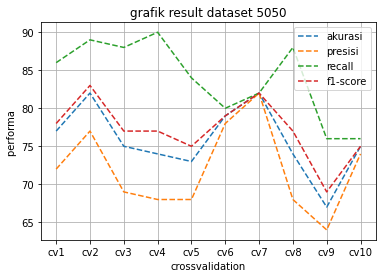

In [216]:
from matplotlib import pyplot as plot
x = ["cv1", "cv2", "cv3", "cv4", "cv5","cv6","cv7","cv8","cv9","cv10"]
a= [77,82,75,74,73,79,82,74,67,75]
p= [72,77,69,68,68,78,82,68,64,74]
r= [86,89,88,90,84,80,82,88,76,76]
f= [78,83,77,77,75,79,82,77,69,75]
plt.plot(x, a, '--')
plt.plot(x, p, '--')
plt.plot(x, r, '--')
plt.plot(x, f, '--')
plt.title("grafik result dataset 5050")
plt.xlabel("crossvalidation")
plt.ylabel("performa ")
plt.legend(["akurasi","presisi", "recall", "f1-score"])
plt.grid()
plt.show()

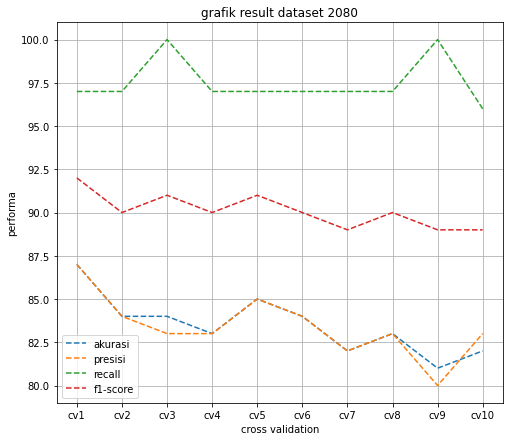

In [218]:
from matplotlib import pyplot as plot
plt.figure(figsize=(8,7))
x = ["cv1", "cv2", "cv3", "cv4", "cv5", "cv6", "cv7", "cv8", "cv9", "cv10"]
a= [87,84,84,83,85,84,82,83,81,82]
p= [87,84,83,83,85,84,82,83,80,83]
r= [97,97,100,97,97,97,97,97,100,96]
f= [92,90,91,90,91,90,89,90,89,89]
plt.plot(x, a, '--')
plt.plot(x, p, '--')
plt.plot(x, r, '--')
plt.plot(x, f, '--')
plt.title("grafik result dataset 2080")
plt.xlabel("cross validation")
plt.ylabel("performa")
plt.legend(["akurasi","presisi", "recall", "f1-score"])
plt.grid()
plt.show()

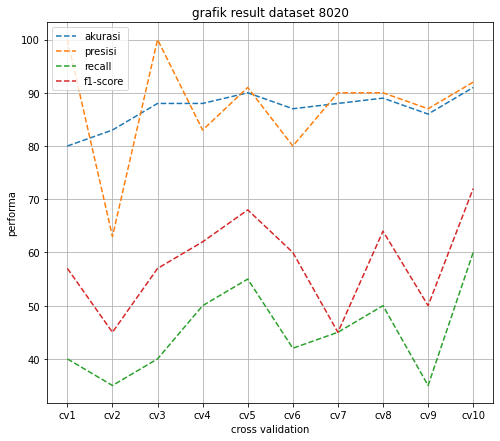

In [219]:
from matplotlib import pyplot as plot
plt.figure(figsize=(8,7))
x = ["cv1", "cv2", "cv3", "cv4", "cv5", "cv6", "cv7", "cv8", "cv9", "cv10"]
a= [80,83,88,88,90,87,88,89,86,91]
p= [100,63,100,83,91,80,90,90,87,92]
r= [40,35,40,50,55,42,45,50,35,60]
f= [57,45,57,62,68,60,45,64,50,72]
plt.plot(x, a, '--')
plt.plot(x, p, '--')
plt.plot(x, r, '--')
plt.plot(x, f, '--')
plt.title("grafik result dataset 8020")
plt.xlabel("cross validation")
plt.ylabel("performa")
plt.legend(["akurasi","presisi", "recall", "f1-score"])
plt.grid()
plt.show()

[[77, 78, 71, 71, 68, 71, 80, 70, 65, 71], [82, 68, 70, 65, 72, 76, 81, 67, 62, 71], [75, 74, 75, 69, 65, 75, 77, 68, 64, 73], [74, 69, 69, 69, 63, 68, 71, 70, 59, 71], [73, 71, 81, 70, 66, 75, 81, 66, 62, 73], [79, 74, 79, 71, 62, 69, 79, 67, 64, 71], [82, 73, 79, 69, 62, 72, 78, 67, 66, 71], [74, 70, 74, 70, 70, 67, 73, 76, 61, 70], [67, 74, 78, 72, 67, 69, 72, 80, 71, 72], [75, 70, 80, 69, 66, 70, 74, 78, 66, 63]]


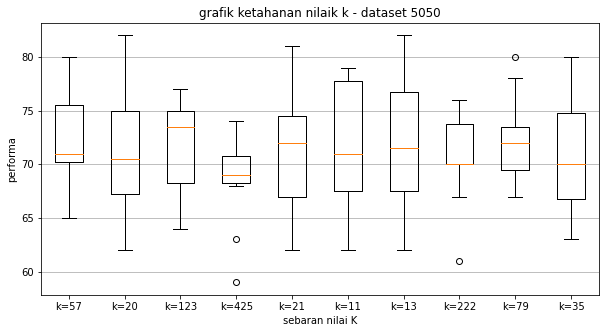

In [217]:
fig1, ax1 = plt.subplots(figsize=(10,5))

# perubahan nilai k
all_data = [
            [77,78,71,71,68,71,80,70,65,71],
            [82,68,70,65,72,76,81,67,62,71],
            [75,74,75,69,65,75,77,68,64,73],
            [74,69,69,69,63,68,71,70,59,71],
            [73,71,81,70,66,75,81,66,62,73],
            [79,74,79,71,62,69,79,67,64,71],
            [82,73,79,69,62,72,78,67,66,71],
            [74,70,74,70,70,67,73,76,61,70],
            [67,74,78,72,67,69,72,80,71,72],
            [75,70,80,69,66,70,74,78,66,63]
          ]
print(all_data)

# plot box plot
ax1.boxplot(all_data)
ax1.set_title('grafik ketahanan nilaik k - dataset 5050')

#adding horizontal grid lines

ax1.yaxis.grid(True)
ax1.set_xticks([y +1 for y in range(len(all_data))])
ax1.set_xlabel('sebaran nilai K')
ax1.set_ylabel('performa')

#add x-tick labels
plt.setp(ax1, xticks=[y+1 for y in range(len(all_data))],
         xticklabels=[ 'k=57','k=20','k=123','k=425','k=21','k=11','k=13','k=222','k=79','k=35'])
plt.show()

[[87, 60, 79, 84, 83, 80, 81, 78, 74, 79], [82, 81, 66, 79, 83, 80, 78, 82, 80, 78], [84, 80, 81, 80, 80, 80, 80, 80, 80, 80], [82, 81, 66, 79, 83, 80, 78, 82, 80, 78], [85, 61, 82, 78, 84, 79, 80, 85, 79, 78], [84, 84, 80, 82, 80, 81, 81, 80, 81, 83], [80, 82, 63, 79, 83, 80, 80, 81, 80, 80], [83, 79, 64, 80, 81, 80, 83, 80, 80, 80], [81, 80, 81, 80, 80, 80, 80, 80, 80, 80], [82, 85, 62, 81, 80, 84, 79, 84, 81, 80]]


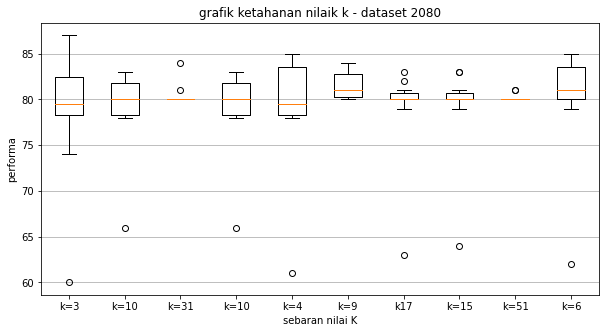

In [220]:
fig1, ax1 = plt.subplots(figsize=(10,5))

# perubahan nilai k
all_data = [
            [87,60,79,84,83,80,81,78,74,79],
            [82,81,66,79,83,80,78,82,80,78],
            [84,80,81,80,80,80,80,80,80,80],
            [82,81,66,79,83,80,78,82,80,78],
            [85,61,82,78,84,79,80,85,79,78],
            [84,84,80,82,80,81,81,80,81,83],
            [80,82,63,79,83,80,80,81,80,80],
            [83,79,64,80,81,80,83,80,80,80],
            [81,80,81,80,80,80,80,80,80,80],
            [82,85,62,81,80,84,79,84,81,80],
          ]
print(all_data)

# plot box plot
ax1.boxplot(all_data)
ax1.set_title('grafik ketahanan nilaik k - dataset 2080')

#adding horizontal grid lines

ax1.yaxis.grid(True)
ax1.set_xticks([y +1 for y in range(len(all_data))])
ax1.set_xlabel('sebaran nilai K')
ax1.set_ylabel('performa')

#add x-tick labels
plt.setp(ax1, xticks=[y+1 for y in range(len(all_data))],
         xticklabels=[ 'k=3','k=10','k=31','k=10','k=4','k=9','k17','k=15','k=51','k=6'])
plt.show()

[[83, 82, 88, 86, 81, 89, 88, 82, 86, 86], [87, 83, 86, 87, 90, 87, 86, 89, 86, 89], [83, 82, 88, 86, 81, 89, 88, 82, 86, 86], [84, 83, 87, 88, 82, 83, 88, 88, 82, 91], [87, 83, 86, 87, 90, 87, 86, 89, 86, 89], [87, 83, 86, 87, 90, 87, 86, 89, 86, 89], [84, 83, 87, 88, 82, 83, 88, 88, 82, 91], [89, 75, 79, 84, 85, 85, 79, 79, 84, 84], [87, 83, 86, 87, 90, 87, 86, 89, 86, 89], [84, 83, 87, 88, 82, 83, 88, 88, 82, 91]]


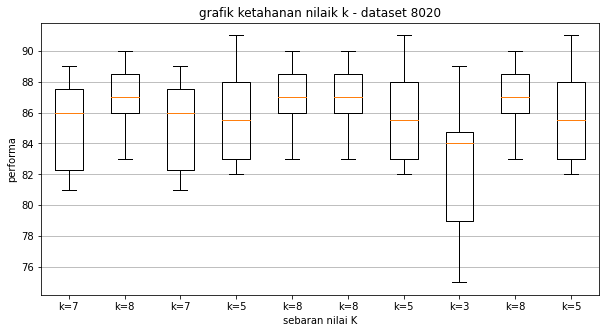

In [221]:
fig1, ax1 = plt.subplots(figsize=(10,5))

# perubahan nilai k
all_data = [
            [83,82,88,86,81,89,88,82,86,86],
            [87,83,86,87,90,87,86,89,86,89],
            [83,82,88,86,81,89,88,82,86,86],
            [84,83,87,88,82,83,88,88,82,91],
            [87,83,86,87,90,87,86,89,86,89],
            [87,83,86,87,90,87,86,89,86,89],
            [84,83,87,88,82,83,88,88,82,91],
            [89,75,79,84,85,85,79,79,84,84],
            [87,83,86,87,90,87,86,89,86,89],
            [84,83,87,88,82,83,88,88,82,91]
          ]
print(all_data)

# plot box plot
ax1.boxplot(all_data)
ax1.set_title('grafik ketahanan nilaik k - dataset 8020')

#adding horizontal grid lines

ax1.yaxis.grid(True)
ax1.set_xticks([y +1 for y in range(len(all_data))])
ax1.set_xlabel('sebaran nilai K')
ax1.set_ylabel('performa')

#add x-tick labels
plt.setp(ax1, xticks=[y+1 for y in range(len(all_data))],
         xticklabels=[ 'k=7','k=8','k=7','k=5','k=8','k=8','k=5','k=3','k=8','k=5'])
plt.show()